# ABLATION STUDY

## BaseLine Model

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import convnext_base

num_classes = 4


model = convnext_base(pretrained=True)


model.classifier[2] = nn.Linear(model.classifier[2].in_features, num_classes)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


dummy_input = torch.randn(1, 3, 224, 224).to(device)
outputs = model(dummy_input)
print(outputs)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Base_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Base_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/convnext_base-6075fbad.pth" to /root/.cache/torch/hub/checkpoints/convnext_base-6075fbad.pth


100%|██████████| 338M/338M [00:02<00:00, 138MB/s]


tensor([[-0.2646,  0.1171,  0.2088, -0.0758]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Base_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Base_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Train Loss: 0.2755, Train Acc: 0.9046, Val Loss: 0.1176, Val Acc: 0.9589
Epoch [2/20], Train Loss: 0.0554, Train Acc: 0.9801, Val Loss: 0.0436, Val Acc: 0.9895
Epoch [3/20], Train Loss: 0.0217, Train Acc: 0.9926, Val Loss: 0.0430, Val Acc: 0.9851
Epoch [4/20], Train Loss: 0.0121, Train Acc: 0.9965, Val Loss: 0.0559, Val Acc: 0.9878
Epoch [5/20], Train Loss: 0.0192, Train Acc: 0.9947, Val Loss: 0.0320, Val Acc: 0.9878
Epoch [6/20], Train Loss: 0.0215, Train Acc: 0.9937, Val Loss: 0.0437, Val Acc: 0.9860
Epoch [7/20], Train Loss: 0.0104, Train Acc: 0.9965, Val Loss: 0.0373, Val Acc: 0.9921
Epoch [8/20], Train Loss: 0.0007, Train Acc: 1.0000, Val Loss: 0.0234, Val Acc: 0.9965
Epoch [9/20], Train Loss: 0.0075, Train Acc: 0.9976, Val Loss: 0.0282, Val Acc: 0.9930
Epoch [10/20], Train Loss: 0.0137, Train Acc: 0.9961, Val Loss: 0.0327, Val Acc: 0.9921
Epoch [11/20], Train Loss: 0.0011, Train Acc: 1.0000, Val Loss: 0.0411, Val Acc: 0.9930
Epoch [12/20], Train Loss: 0.0009, Train 

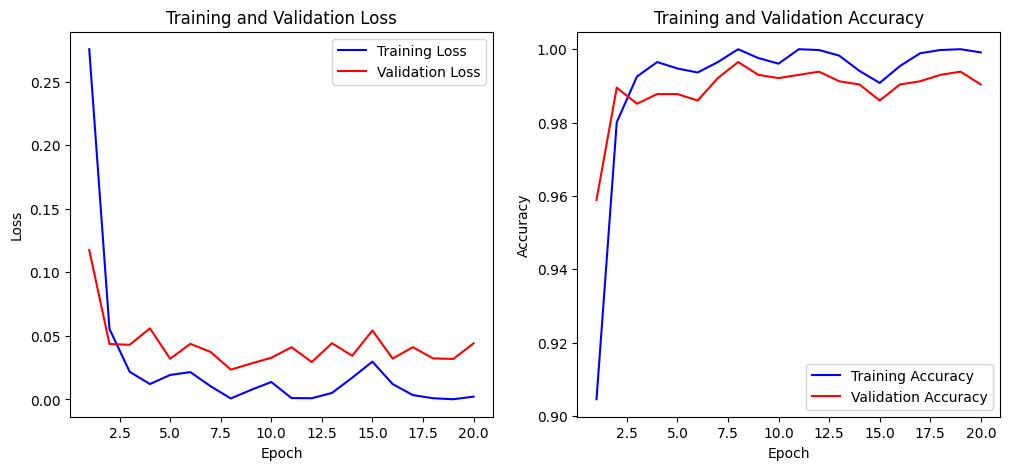

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


num_classes = 4
batch_size = 32
num_epochs = 20
learning_rate = 1e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


train_dataset = datasets.ImageFolder(root='/content/dataset_split/train', transform=transform)
val_dataset = datasets.ImageFolder(root='/content/dataset_split/val', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

convnext_base = models.convnext_base(pretrained=True)
convnext_base.classifier[2] = nn.Linear(convnext_base.classifier[2].in_features, num_classes)
convnext_base = convnext_base.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(convnext_base.parameters(), lr=learning_rate)


train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []


for epoch in range(num_epochs):
    convnext_base.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = convnext_base(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total


    convnext_base.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = convnext_base(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_running_loss / val_total
    val_acc = val_correct / val_total


    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')


torch.save(convnext_base.state_dict(), 'convnext_base_trained.pth')


epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b-', label='Training Loss')
plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracies, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


### Figshare Test Dataset

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Classification Report:

              precision    recall  f1-score   support

      glioma     1.0000    0.9930    0.9965       143
  meningioma     0.9935    1.0000    0.9967       152
     notumor     1.0000    1.0000    1.0000       144
   pituitary     1.0000    1.0000    1.0000       152

    accuracy                         0.9983       591
   macro avg     0.9984    0.9983    0.9983       591
weighted avg     0.9983    0.9983    0.9983       591



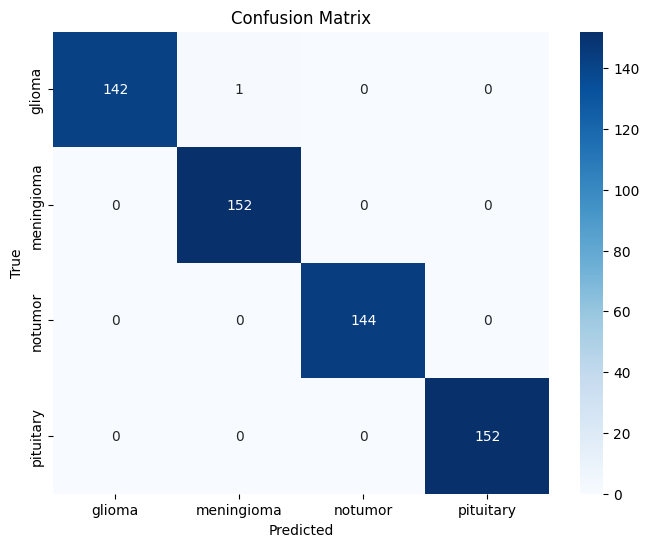

Macro-average AUC score: 1.0000
Cohen's Kappa Score: 0.9977


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ['glioma','meningioma','notumor','pituitary']
num_classes = len(class_names)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/ntest', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


model = models.convnext_base(pretrained=False)
if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Sequential):
    in_features = model.classifier[2].in_features
    model.classifier[2] = nn.Linear(in_features, num_classes)
else:
    raise ValueError('No recognizable classifier head found.')

model = model.to(device)


model.load_state_dict(torch.load('convnext_base_trained.pth', map_location=device))
model.eval()


y_true = []
y_pred = []
y_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(probs.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)


print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


y_true_onehot = label_binarize(y_true, classes=range(num_classes))


auc = roc_auc_score(y_true_onehot, y_scores, average='macro', multi_class='ovr')
print(f"Macro-average AUC score: {auc:.4f}")


kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")

### Kaggle Test Dataset

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Classification Report:

              precision    recall  f1-score   support

   pituitary     0.9967    0.9967    0.9967       300
  meningioma     0.9935    0.9935    0.9935       306
     notumor     1.0000    0.9975    0.9988       405
      glioma     0.9967    1.0000    0.9983       300

    accuracy                         0.9969      1311
   macro avg     0.9967    0.9969    0.9968      1311
weighted avg     0.9970    0.9969    0.9969      1311



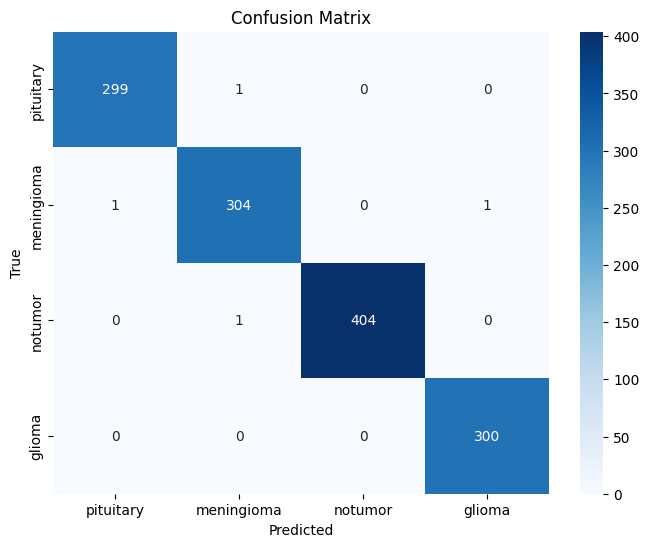

Macro-average AUC score: 0.9998
Cohen's Kappa Score: 0.9959


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ['pituitary','meningioma', 'notumor',  'glioma']
num_classes = len(class_names)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/newtest/Testing', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


model = models.convnext_base(pretrained=False)
if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Sequential):
    in_features = model.classifier[2].in_features
    model.classifier[2] = nn.Linear(in_features, num_classes)
else:
    raise ValueError('No recognizable classifier head found.')

model = model.to(device)


model.load_state_dict(torch.load('convnext_base_trained.pth', map_location=device))
model.eval()


y_true = []
y_pred = []
y_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(probs.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)


print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


y_true_onehot = label_binarize(y_true, classes=range(num_classes))


auc = roc_auc_score(y_true_onehot, y_scores, average='macro', multi_class='ovr')
print(f"Macro-average AUC score: {auc:.4f}")


kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")


### Other Dataset 254x254

Classification Report:

              precision    recall  f1-score   support

      glioma     1.0000    0.9969    0.9985       324
  meningioma     0.9972    1.0000    0.9986       355
     notumor     0.9975    0.9975    0.9975       400
   pituitary     1.0000    1.0000    1.0000       351

    accuracy                         0.9986      1430
   macro avg     0.9987    0.9986    0.9986      1430
weighted avg     0.9986    0.9986    0.9986      1430



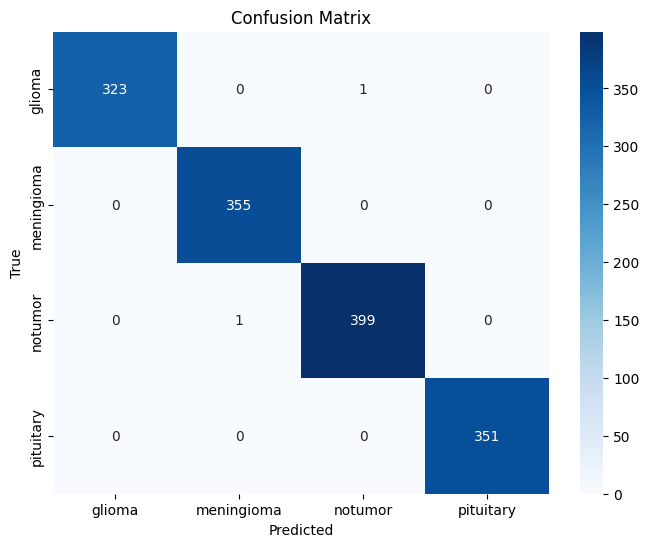

Macro-average AUC score: 1.0000
Cohen's Kappa Score: 0.9981


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ['glioma','meningioma','notumor','pituitary']
num_classes = len(class_names)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/testcase/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


model = models.convnext_base(pretrained=False)
if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Sequential):
    in_features = model.classifier[2].in_features
    model.classifier[2] = nn.Linear(in_features, num_classes)
else:
    raise ValueError('No recognizable classifier head found.')

model = model.to(device)


model.load_state_dict(torch.load('convnext_base_trained.pth', map_location=device))
model.eval()


y_true = []
y_pred = []
y_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(probs.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)


print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


y_true_onehot = label_binarize(y_true, classes=range(num_classes))


auc = roc_auc_score(y_true_onehot, y_scores, average='macro', multi_class='ovr')
print(f"Macro-average AUC score: {auc:.4f}")


kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")

## Remove Data Augmentation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


num_classes = 4
batch_size = 32
num_epochs = 20
learning_rate = 1e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



train_transform_no_aug = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


train_dataset = datasets.ImageFolder(root='/content/dataset_split/train', transform=train_transform_no_aug)
val_dataset = datasets.ImageFolder(root='/content/dataset_split/val', transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)


model = models.convnext_base(pretrained=True)
model.classifier[2] = nn.Linear(model.classifier[2].in_features, num_classes)
model = model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / total
    train_acc = correct / total

    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_running_loss / val_total
    val_acc = val_correct / val_total

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")


torch.save(model.state_dict(), 'convnext_no_augmentation.pth')


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Base_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Base_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20] - Train Loss: 0.2725, Train Acc: 0.9006, Val Loss: 0.0801, Val Acc: 0.9712
Epoch [2/20] - Train Loss: 0.0503, Train Acc: 0.9827, Val Loss: 0.0680, Val Acc: 0.9825
Epoch [3/20] - Train Loss: 0.0207, Train Acc: 0.9941, Val Loss: 0.0368, Val Acc: 0.9904
Epoch [4/20] - Train Loss: 0.0089, Train Acc: 0.9976, Val Loss: 0.0606, Val Acc: 0.9869
Epoch [5/20] - Train Loss: 0.0127, Train Acc: 0.9954, Val Loss: 0.0485, Val Acc: 0.9869
Epoch [6/20] - Train Loss: 0.0209, Train Acc: 0.9937, Val Loss: 0.1209, Val Acc: 0.9642
Epoch [7/20] - Train Loss: 0.0068, Train Acc: 0.9980, Val Loss: 0.0561, Val Acc: 0.9851
Epoch [8/20] - Train Loss: 0.0039, Train Acc: 0.9989, Val Loss: 0.0426, Val Acc: 0.9921
Epoch [9/20] - Train Loss: 0.0005, Train Acc: 1.0000, Val Loss: 0.0452, Val Acc: 0.9904
Epoch [10/20] - Train Loss: 0.0003, Train Acc: 1.0000, Val Loss: 0.0398, Val Acc: 0.9921
Epoch [11/20] - Train Loss: 0.0002, Train Acc: 1.0000, Val Loss: 0.0409, Val Acc: 0.9930
Epoch [12/20] - Train Loss: 0.

### Figshare test dataset

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Classification Report:

              precision    recall  f1-score   support

      glioma     1.0000    0.9930    0.9965       143
  meningioma     0.9935    1.0000    0.9967       152
     notumor     1.0000    1.0000    1.0000       144
   pituitary     1.0000    1.0000    1.0000       152

    accuracy                         0.9983       591
   macro avg     0.9984    0.9983    0.9983       591
weighted avg     0.9983    0.9983    0.9983       591



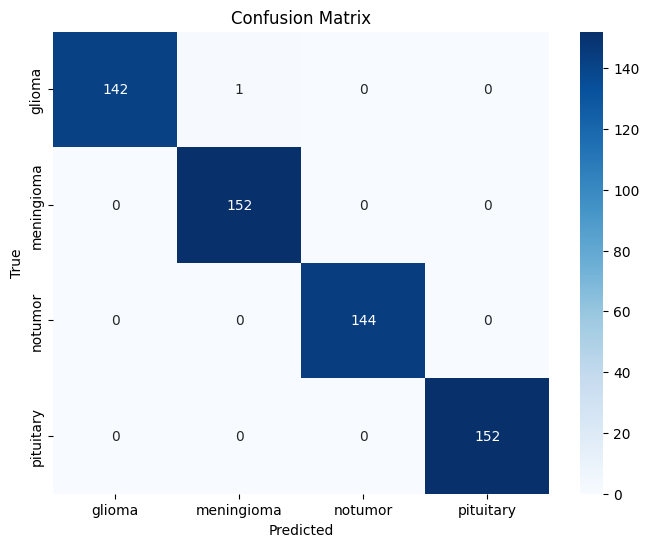

Macro-average AUC score: 1.0000
Cohen's Kappa Score: 0.9977


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ['glioma','meningioma','notumor','pituitary']
num_classes = len(class_names)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/ntest', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


model = models.convnext_base(pretrained=False)
if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Sequential):
    in_features = model.classifier[2].in_features
    model.classifier[2] = nn.Linear(in_features, num_classes)
else:
    raise ValueError('No recognizable classifier head found.')

model = model.to(device)


model.load_state_dict(torch.load('convnext_no_augmentation.pth', map_location=device))
model.eval()


y_true = []
y_pred = []
y_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(probs.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)


print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


y_true_onehot = label_binarize(y_true, classes=range(num_classes))


auc = roc_auc_score(y_true_onehot, y_scores, average='macro', multi_class='ovr')
print(f"Macro-average AUC score: {auc:.4f}")


kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Classification Report:

              precision    recall  f1-score   support

      glioma     1.0000    0.9650    0.9822       143
  meningioma     0.9212    1.0000    0.9590       152
     notumor     1.0000    0.9861    0.9930       144
   pituitary     1.0000    0.9605    0.9799       152

    accuracy                         0.9780       591
   macro avg     0.9803    0.9779    0.9785       591
weighted avg     0.9797    0.9780    0.9783       591



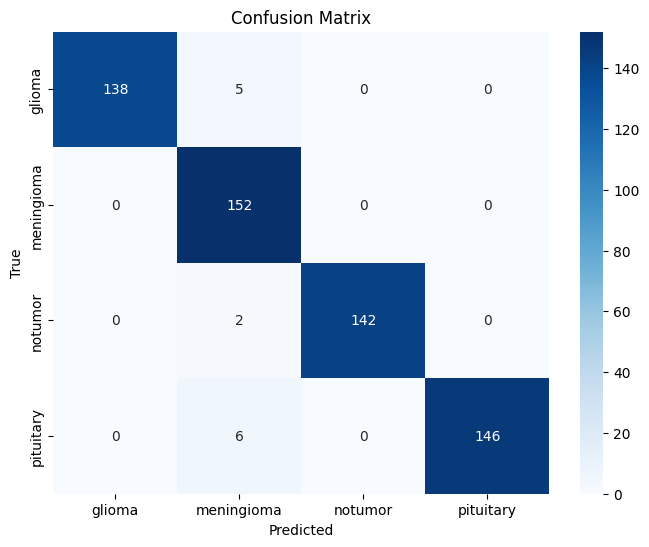

Macro-average AUC score: 0.9999
Cohen's Kappa Score: 0.9707


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ['glioma','meningioma','notumor','pituitary']
num_classes = len(class_names)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/ntest', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


model = models.convnext_base(pretrained=False)
if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Sequential):
    in_features = model.classifier[2].in_features
    model.classifier[2] = nn.Linear(in_features, num_classes)
else:
    raise ValueError('No recognizable classifier head found.')

model = model.to(device)


model.load_state_dict(torch.load('convnext_no_augmentation.pth', map_location=device))
model.eval()


y_true = []
y_pred = []
y_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(probs.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)


print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


y_true_onehot = label_binarize(y_true, classes=range(num_classes))


auc = roc_auc_score(y_true_onehot, y_scores, average='macro', multi_class='ovr')
print(f"Macro-average AUC score: {auc:.4f}")


kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")

### Kaggle Test Dataset

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Classification Report:

              precision    recall  f1-score   support

   pituitary     0.9932    0.9767    0.9849       300
  meningioma     0.9301    1.0000    0.9638       306
     notumor     1.0000    0.9975    0.9988       405
      glioma     1.0000    0.9433    0.9708       300

    accuracy                         0.9809      1311
   macro avg     0.9808    0.9794    0.9796      1311
weighted avg     0.9821    0.9809    0.9810      1311



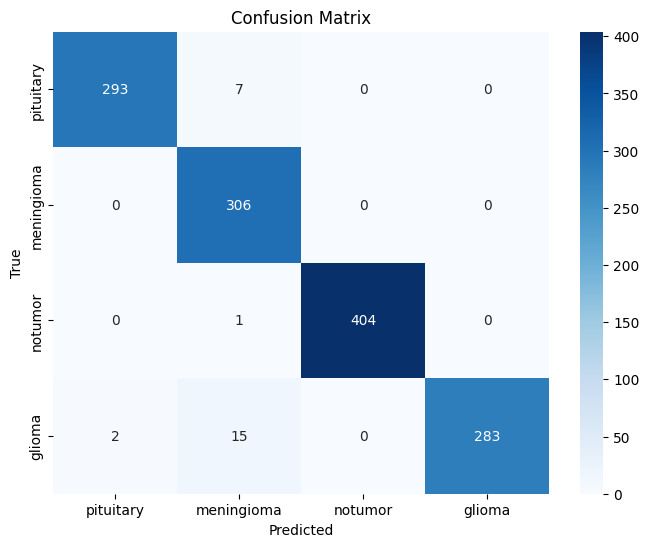

Macro-average AUC score: 0.9992
Cohen's Kappa Score: 0.9744


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ['pituitary','meningioma', 'notumor',  'glioma']
num_classes = len(class_names)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/newtest/Testing', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


model = models.convnext_base(pretrained=False)
if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Sequential):
    in_features = model.classifier[2].in_features
    model.classifier[2] = nn.Linear(in_features, num_classes)
else:
    raise ValueError('No recognizable classifier head found.')

model = model.to(device)


model.load_state_dict(torch.load('convnext_no_augmentation.pth', map_location=device))
model.eval()


y_true = []
y_pred = []
y_scores = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(probs.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)


print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


y_true_onehot = label_binarize(y_true, classes=range(num_classes))


auc = roc_auc_score(y_true_onehot, y_scores, average='macro', multi_class='ovr')
print(f"Macro-average AUC score: {auc:.4f}")


kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")


### Other Dataset 254X254

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Classification Report:

              precision    recall  f1-score   support

      glioma     1.0000    0.9907    0.9953       324
  meningioma     0.9569    1.0000    0.9780       355
     notumor     1.0000    0.9925    0.9962       400
   pituitary     1.0000    0.9715    0.9855       351

    accuracy                         0.9888      1430
   macro avg     0.9892    0.9887    0.9888      1430
weighted avg     0.9893    0.9888    0.9889      1430



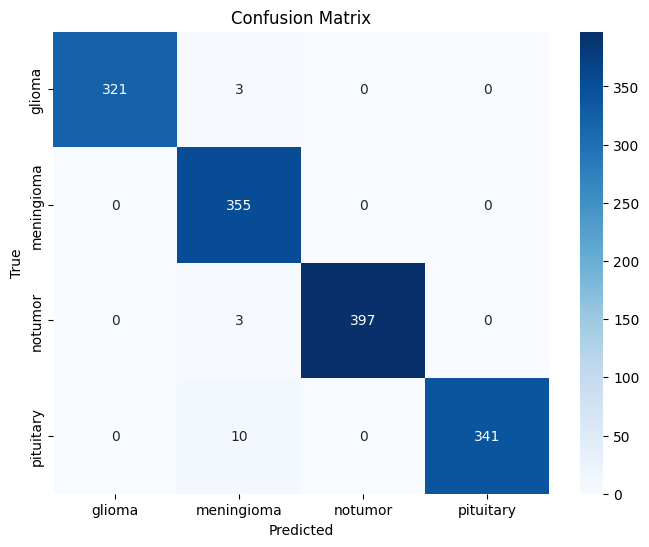

Macro-average AUC score: 0.9995
Cohen's Kappa Score: 0.9851


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ['glioma','meningioma','notumor','pituitary']
num_classes = len(class_names)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/testcase/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


model = models.convnext_base(pretrained=False)
if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Sequential):
    in_features = model.classifier[2].in_features
    model.classifier[2] = nn.Linear(in_features, num_classes)
else:
    raise ValueError('No recognizable classifier head found.')

model = model.to(device)


model.load_state_dict(torch.load('convnext_no_augmentation.pth', map_location=device))
model.eval()


y_true = []
y_pred = []
y_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(probs.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)


print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


y_true_onehot = label_binarize(y_true, classes=range(num_classes))


auc = roc_auc_score(y_true_onehot, y_scores, average='macro', multi_class='ovr')
print(f"Macro-average AUC score: {auc:.4f}")


kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")

## Removing MHCA attention layers from convnext

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader


num_classes = 4
batch_size = 32
num_epochs = 20
learning_rate = 1e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



def remove_attention_from_convnext(model: nn.Module):

    for name, module in model.named_modules():
        if hasattr(module, 'attn'):
            setattr(module, 'attn', nn.Identity())
    return model



train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])


train_dataset = datasets.ImageFolder(root='/content/dataset_split/train', transform=train_transform)
val_dataset = datasets.ImageFolder(root='/content/dataset_split/val', transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)



model = models.convnext_base(pretrained=True)
model.classifier[2] = nn.Linear(model.classifier[2].in_features, num_classes)
model = remove_attention_from_convnext(model)
model = model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)



for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / total
    train_acc = correct / total

    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_running_loss / val_total
    val_acc = val_correct / val_total

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")



torch.save(model.state_dict(), 'convnext_base_no_attention.pth')


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Base_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Base_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20] - Train Loss: 0.3670, Train Acc: 0.8680, Val Loss: 0.0882, Val Acc: 0.9747
Epoch [2/20] - Train Loss: 0.1509, Train Acc: 0.9457, Val Loss: 0.0672, Val Acc: 0.9773
Epoch [3/20] - Train Loss: 0.1229, Train Acc: 0.9547, Val Loss: 0.0387, Val Acc: 0.9904
Epoch [4/20] - Train Loss: 0.0922, Train Acc: 0.9707, Val Loss: 0.0640, Val Acc: 0.9799
Epoch [5/20] - Train Loss: 0.0937, Train Acc: 0.9672, Val Loss: 0.0438, Val Acc: 0.9869
Epoch [6/20] - Train Loss: 0.0907, Train Acc: 0.9687, Val Loss: 0.0340, Val Acc: 0.9921
Epoch [7/20] - Train Loss: 0.0796, Train Acc: 0.9700, Val Loss: 0.0524, Val Acc: 0.9843
Epoch [8/20] - Train Loss: 0.0706, Train Acc: 0.9733, Val Loss: 0.0896, Val Acc: 0.9764
Epoch [9/20] - Train Loss: 0.0752, Train Acc: 0.9724, Val Loss: 0.0552, Val Acc: 0.9843
Epoch [10/20] - Train Loss: 0.0687, Train Acc: 0.9748, Val Loss: 0.0430, Val Acc: 0.9895
Epoch [11/20] - Train Loss: 0.0644, Train Acc: 0.9788, Val Loss: 0.0709, Val Acc: 0.9808
Epoch [12/20] - Train Loss: 0.

### Figshare Test Dataset

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Classification Report:

              precision    recall  f1-score   support

      glioma     0.9795    1.0000    0.9896       143
  meningioma     0.9935    1.0000    0.9967       152
     notumor     1.0000    0.9861    0.9930       144
   pituitary     1.0000    0.9868    0.9934       152

    accuracy                         0.9932       591
   macro avg     0.9932    0.9932    0.9932       591
weighted avg     0.9933    0.9932    0.9932       591



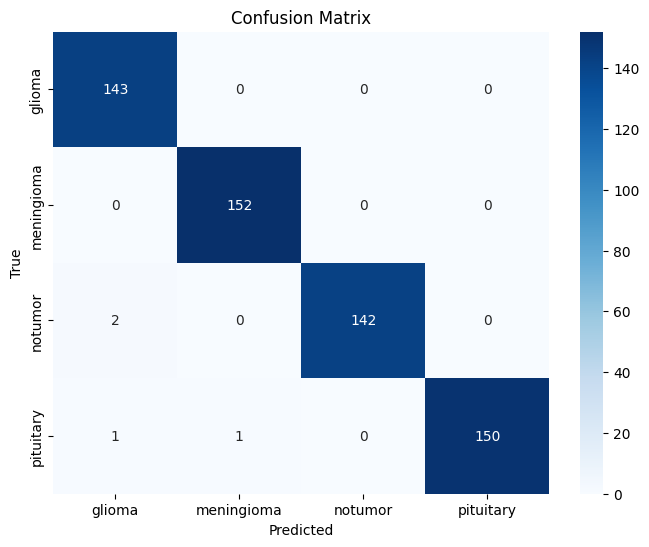

Macro-average AUC score: 1.0000
Cohen's Kappa Score: 0.9910


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ['glioma','meningioma','notumor','pituitary']
num_classes = len(class_names)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/ntest', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


model = models.convnext_base(pretrained=False)
if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Sequential):
    in_features = model.classifier[2].in_features
    model.classifier[2] = nn.Linear(in_features, num_classes)
else:
    raise ValueError('No recognizable classifier head found.')

model = model.to(device)


model.load_state_dict(torch.load('convnext_base_no_attention.pth', map_location=device))
model.eval()


y_true = []
y_pred = []
y_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(probs.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)


print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


y_true_onehot = label_binarize(y_true, classes=range(num_classes))


auc = roc_auc_score(y_true_onehot, y_scores, average='macro', multi_class='ovr')
print(f"Macro-average AUC score: {auc:.4f}")


kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")

### Kaggle Dataset

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Classification Report:

              precision    recall  f1-score   support

   pituitary     0.9966    0.9833    0.9899       300
  meningioma     0.9677    0.9804    0.9740       306
     notumor     0.9854    0.9975    0.9914       405
      glioma     1.0000    0.9833    0.9916       300

    accuracy                         0.9870      1311
   macro avg     0.9874    0.9861    0.9867      1311
weighted avg     0.9872    0.9870    0.9871      1311



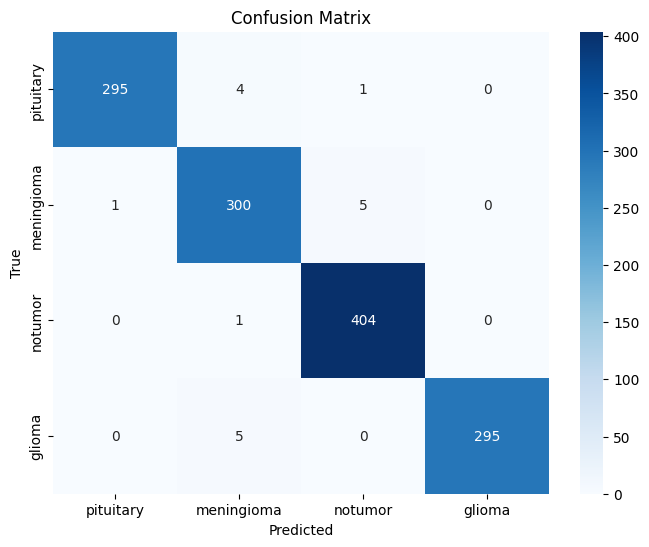

Macro-average AUC score: 0.9992
Cohen's Kappa Score: 0.9826


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ['pituitary','meningioma', 'notumor',  'glioma']
num_classes = len(class_names)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/newtest/Testing', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


model = models.convnext_base(pretrained=False)
if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Sequential):
    in_features = model.classifier[2].in_features
    model.classifier[2] = nn.Linear(in_features, num_classes)
else:
    raise ValueError('No recognizable classifier head found.')

model = model.to(device)


model.load_state_dict(torch.load('convnext_base_no_attention.pth', map_location=device))
model.eval()


y_true = []
y_pred = []
y_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(probs.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)


print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


y_true_onehot = label_binarize(y_true, classes=range(num_classes))


auc = roc_auc_score(y_true_onehot, y_scores, average='macro', multi_class='ovr')
print(f"Macro-average AUC score: {auc:.4f}")


kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")

### Other Dataset 254X254

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Classification Report:

              precision    recall  f1-score   support

      glioma     0.9969    0.9969    0.9969       324
  meningioma     0.9915    0.9915    0.9915       355
     notumor     0.9950    0.9975    0.9963       400
   pituitary     0.9971    0.9943    0.9957       351

    accuracy                         0.9951      1430
   macro avg     0.9952    0.9951    0.9951      1430
weighted avg     0.9951    0.9951    0.9951      1430



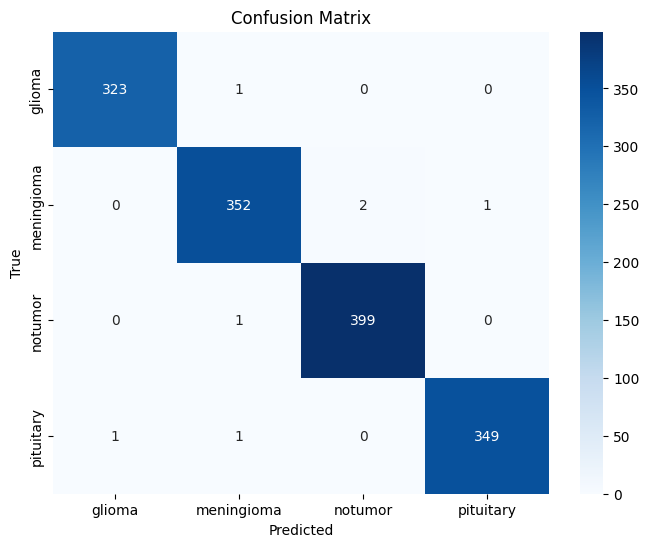

Macro-average AUC score: 0.9993
Cohen's Kappa Score: 0.9935


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ['glioma','meningioma','notumor','pituitary']
num_classes = len(class_names)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/testcase/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


model = models.convnext_base(pretrained=False)
if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Sequential):
    in_features = model.classifier[2].in_features
    model.classifier[2] = nn.Linear(in_features, num_classes)
else:
    raise ValueError('No recognizable classifier head found.')

model = model.to(device)


model.load_state_dict(torch.load('convnext_base_no_attention.pth', map_location=device))
model.eval()


y_true = []
y_pred = []
y_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(probs.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)


print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


y_true_onehot = label_binarize(y_true, classes=range(num_classes))


auc = roc_auc_score(y_true_onehot, y_scores, average='macro', multi_class='ovr')
print(f"Macro-average AUC score: {auc:.4f}")


kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")

## No Transfer Learning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader


num_classes = 4
batch_size = 32
num_epochs = 20
learning_rate = 1e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


train_dataset = datasets.ImageFolder(root='/content/dataset_split/train', transform=train_transform)
val_dataset = datasets.ImageFolder(root='/content/dataset_split/val', transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)


model = models.convnext_base(pretrained=False)
model.classifier[2] = nn.Linear(model.classifier[2].in_features, num_classes)
model = model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / total
    train_acc = correct / total

    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_running_loss / val_total
    val_acc = val_correct / val_total

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")


torch.save(model.state_dict(), 'convnext_base_no_transfer_learning.pth')


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch [1/20] - Train Loss: 1.2553, Train Acc: 0.4223, Val Loss: 1.1886, Val Acc: 0.4196
Epoch [2/20] - Train Loss: 1.1225, Train Acc: 0.5123, Val Loss: 1.0366, Val Acc: 0.5105
Epoch [3/20] - Train Loss: 1.0503, Train Acc: 0.5582, Val Loss: 0.9381, Val Acc: 0.5997
Epoch [4/20] - Train Loss: 1.0441, Train Acc: 0.5648, Val Loss: 1.0891, Val Acc: 0.5472
Epoch [5/20] - Train Loss: 1.0162, Train Acc: 0.5742, Val Loss: 1.1286, Val Acc: 0.5070
Epoch [6/20] - Train Loss: 0.9956, Train Acc: 0.5917, Val Loss: 0.9423, Val Acc: 0.6189
Epoch [7/20] - Train Loss: 0.9989, Train Acc: 0.5869, Val Loss: 1.0441, Val Acc: 0.5411
Epoch [8/20] - Train Loss: 0.9812, Train Acc: 0.5998, Val Loss: 0.8508, Val Acc: 0.6809
Epoch [9/20] - Train Loss: 0.9574, Train Acc: 0.6055, Val Loss: 1.0419, Val Acc: 0.5682
Epoch [10/20] - Train Loss: 0.9217, Train Acc: 0.6248, Val Loss: 0.8357, Val Acc: 0.6486
Epoch [11/20] - Train Loss: 0.8908, Train Acc: 0.6305, Val Loss: 0.8279, Val Acc: 0.6722
Epoch [12/20] - Train Loss: 0.

### Figshare Test Dataset

Classification Report:

              precision    recall  f1-score   support

      glioma     0.8814    0.7273    0.7969       143
  meningioma     0.5000    0.8487    0.6293       152
     notumor     0.8832    0.8403    0.8612       144
   pituitary     0.9359    0.4803    0.6348       152

    accuracy                         0.7225       591
   macro avg     0.8001    0.7241    0.7305       591
weighted avg     0.7978    0.7225    0.7278       591



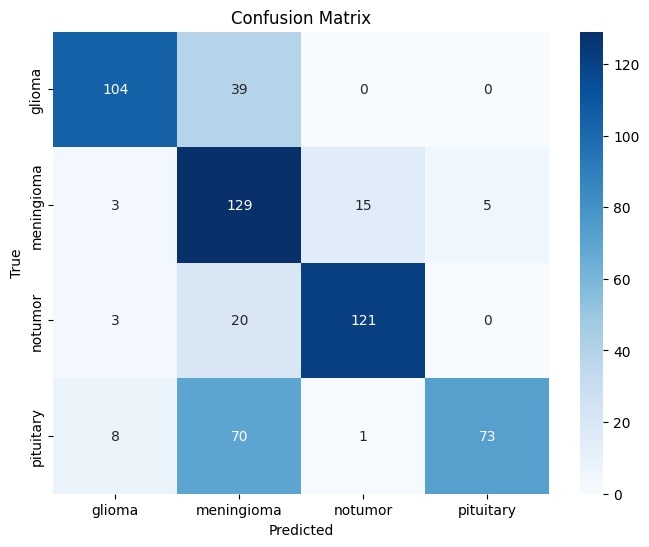

Macro-average AUC score: 0.9290
Cohen's Kappa Score: 0.6295


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ['glioma','meningioma','notumor','pituitary']
num_classes = len(class_names)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/ntest', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


model = models.convnext_base(pretrained=False)
if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Sequential):
    in_features = model.classifier[2].in_features
    model.classifier[2] = nn.Linear(in_features, num_classes)
else:
    raise ValueError('No recognizable classifier head found.')

model = model.to(device)


model.load_state_dict(torch.load('convnext_base_no_transfer_learning.pth', map_location=device))
model.eval()


y_true = []
y_pred = []
y_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(probs.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)


print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


y_true_onehot = label_binarize(y_true, classes=range(num_classes))


auc = roc_auc_score(y_true_onehot, y_scores, average='macro', multi_class='ovr')
print(f"Macro-average AUC score: {auc:.4f}")


kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")

### Kaggle Test Dataset

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Classification Report:

              precision    recall  f1-score   support

   pituitary     0.6667    0.8267    0.7381       300
  meningioma     0.5173    0.5850    0.5491       306
     notumor     0.8198    0.7975    0.8085       405
      glioma     0.9648    0.6400    0.7695       300

    accuracy                         0.7185      1311
   macro avg     0.7422    0.7123    0.7163      1311
weighted avg     0.7473    0.7185    0.7229      1311



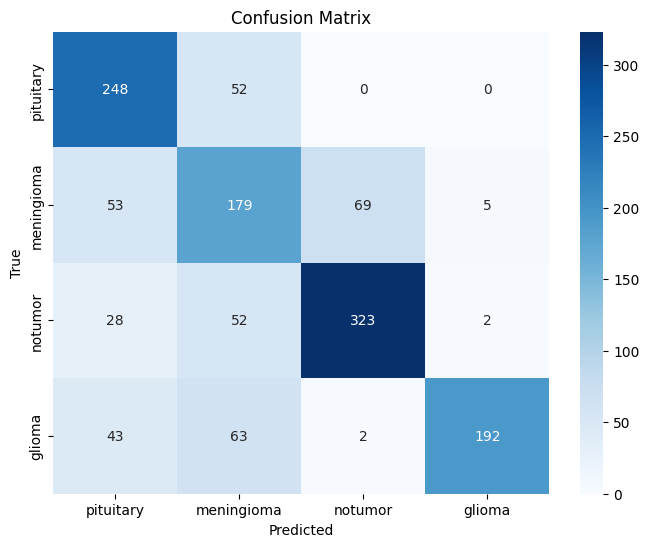

Macro-average AUC score: 0.9132
Cohen's Kappa Score: 0.6226


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ['pituitary','meningioma', 'notumor',  'glioma']
num_classes = len(class_names)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/newtest/Testing', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


model = models.convnext_base(pretrained=False)
if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Sequential):
    in_features = model.classifier[2].in_features
    model.classifier[2] = nn.Linear(in_features, num_classes)
else:
    raise ValueError('No recognizable classifier head found.')

model = model.to(device)

model.load_state_dict(torch.load('convnext_base_no_transfer_learning.pth', map_location=device))
model.eval()


y_true = []
y_pred = []
y_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(probs.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)


print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


y_true_onehot = label_binarize(y_true, classes=range(num_classes))


auc = roc_auc_score(y_true_onehot, y_scores, average='macro', multi_class='ovr')
print(f"Macro-average AUC score: {auc:.4f}")


kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")

### Other Dataset 254X254

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Classification Report:

              precision    recall  f1-score   support

      glioma     0.6609    0.8302    0.7360       324
  meningioma     0.5893    0.6507    0.6185       355
     notumor     0.8995    0.8500    0.8740       400
   pituitary     0.9644    0.6952    0.8079       351

    accuracy                         0.7580      1430
   macro avg     0.7785    0.7565    0.7591      1430
weighted avg     0.7844    0.7580    0.7631      1430



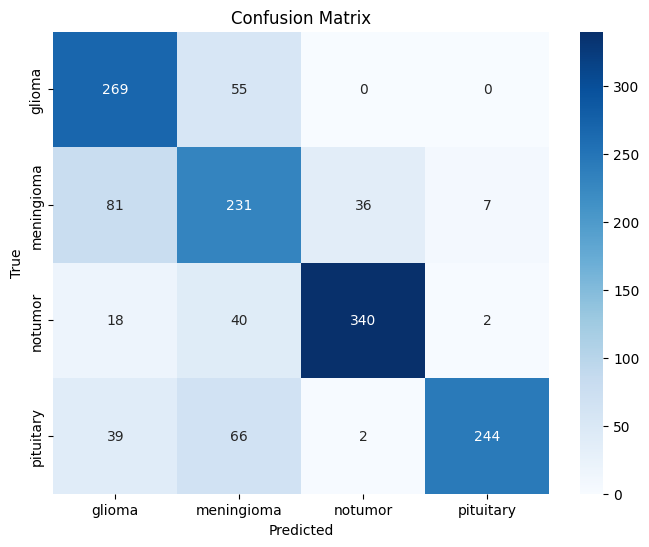

Macro-average AUC score: 0.9393
Cohen's Kappa Score: 0.6774


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ['glioma','meningioma','notumor','pituitary']
num_classes = len(class_names)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/testcase/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


model = models.convnext_base(pretrained=False)
if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Sequential):
    in_features = model.classifier[2].in_features
    model.classifier[2] = nn.Linear(in_features, num_classes)
else:
    raise ValueError('No recognizable classifier head found.')

model = model.to(device)


model.load_state_dict(torch.load('convnext_base_no_transfer_learning.pth', map_location=device))
model.eval()


y_true = []
y_pred = []
y_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(probs.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)


print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


y_true_onehot = label_binarize(y_true, classes=range(num_classes))


auc = roc_auc_score(y_true_onehot, y_scores, average='macro', multi_class='ovr')
print(f"Macro-average AUC score: {auc:.4f}")


kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")

## Changing Input size

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader


num_classes = 4
batch_size = 32
num_epochs = 20
learning_rate = 1e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


train_transform = transforms.Compose([
    transforms.RandomResizedCrop(128),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])


train_dataset = datasets.ImageFolder(root='/content/dataset_split/train', transform=train_transform)
val_dataset = datasets.ImageFolder(root='/content/dataset_split/val', transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)


model = models.convnext_base(pretrained=True)
model.classifier[2] = nn.Linear(model.classifier[2].in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / total
    train_acc = correct / total

    model.eval()
    val_loss_sum = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            val_loss_sum += loss.item() * imgs.size(0)
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_loss = val_loss_sum / val_total
    val_acc = val_correct / val_total

    print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f} Train Acc: {train_acc:.4f} Val Loss: {val_loss:.4f} Val Acc: {val_acc:.4f}")


torch.save(model.state_dict(), 'convnext_base_smaller_input.pth')


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Base_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Base_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20] Train Loss: 0.4081 Train Acc: 0.8511 Val Loss: 0.1407 Val Acc: 0.9484
Epoch [2/20] Train Loss: 0.1640 Train Acc: 0.9391 Val Loss: 0.0982 Val Acc: 0.9703
Epoch [3/20] Train Loss: 0.1345 Train Acc: 0.9496 Val Loss: 0.0619 Val Acc: 0.9799
Epoch [4/20] Train Loss: 0.1204 Train Acc: 0.9582 Val Loss: 0.0910 Val Acc: 0.9738
Epoch [5/20] Train Loss: 0.1041 Train Acc: 0.9617 Val Loss: 0.1555 Val Acc: 0.9458
Epoch [6/20] Train Loss: 0.0990 Train Acc: 0.9663 Val Loss: 0.0678 Val Acc: 0.9816
Epoch [7/20] Train Loss: 0.0730 Train Acc: 0.9748 Val Loss: 0.0559 Val Acc: 0.9816
Epoch [8/20] Train Loss: 0.0923 Train Acc: 0.9685 Val Loss: 0.0554 Val Acc: 0.9790
Epoch [9/20] Train Loss: 0.0756 Train Acc: 0.9744 Val Loss: 0.0591 Val Acc: 0.9781
Epoch [10/20] Train Loss: 0.0648 Train Acc: 0.9794 Val Loss: 0.0463 Val Acc: 0.9878
Epoch [11/20] Train Loss: 0.0787 Train Acc: 0.9715 Val Loss: 0.0516 Val Acc: 0.9860
Epoch [12/20] Train Loss: 0.0560 Train Acc: 0.9810 Val Loss: 0.0564 Val Acc: 0.9860
E

### Figshare Test Dataset

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Classification Report:

              precision    recall  f1-score   support

      glioma     0.9930    0.9930    0.9930       143
  meningioma     1.0000    0.9342    0.9660       152
     notumor     0.9412    1.0000    0.9697       144
   pituitary     0.9935    1.0000    0.9967       152

    accuracy                         0.9814       591
   macro avg     0.9819    0.9818    0.9814       591
weighted avg     0.9823    0.9814    0.9813       591



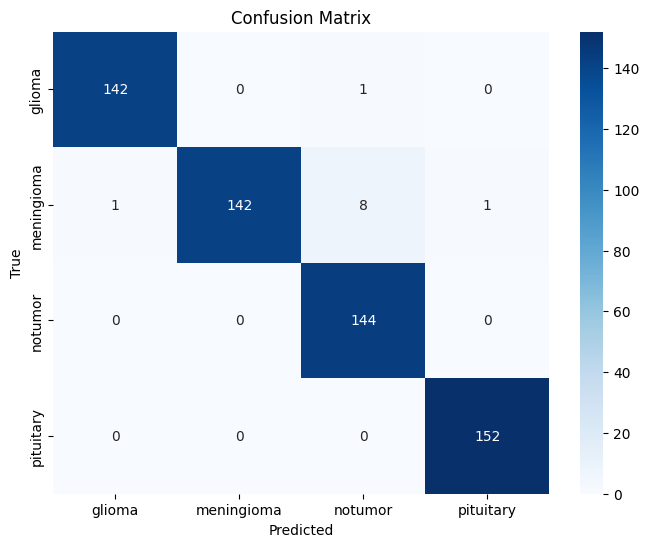

Macro-average AUC score: 1.0000
Cohen's Kappa Score: 0.9752


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



class_names = ['glioma','meningioma','notumor','pituitary']
num_classes = len(class_names)



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])



test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/ntest', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)



model = models.convnext_base(pretrained=False)
if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Sequential):
    in_features = model.classifier[2].in_features
    model.classifier[2] = nn.Linear(in_features, num_classes)
else:
    raise ValueError('No recognizable classifier head found.')


model = model.to(device)



model.load_state_dict(torch.load('convnext_base_smaller_input.pth', map_location=device))
model.eval()


y_true = []
y_pred = []
y_scores = []


with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(probs.cpu().numpy())


y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)


print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

y_true_onehot = label_binarize(y_true, classes=range(num_classes))

auc = roc_auc_score(y_true_onehot, y_scores, average='macro', multi_class='ovr')
print(f"Macro-average AUC score: {auc:.4f}")

kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")


### Kaggle Test Dataset

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Classification Report:

              precision    recall  f1-score   support

   pituitary     0.9868    0.9967    0.9917       300
  meningioma     0.9713    0.9967    0.9839       306
     notumor     1.0000    0.9975    0.9988       405
      glioma     1.0000    0.9667    0.9831       300

    accuracy                         0.9901      1311
   macro avg     0.9895    0.9894    0.9893      1311
weighted avg     0.9903    0.9901    0.9901      1311



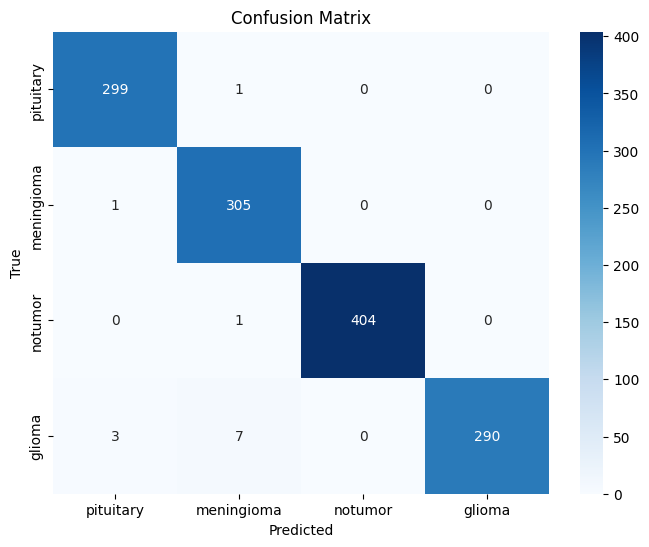

Macro-average AUC score: 0.9991
Cohen's Kappa Score: 0.9867


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



class_names = ['pituitary','meningioma', 'notumor',  'glioma']
num_classes = len(class_names)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/newtest/Testing', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

model = models.convnext_base(pretrained=False)
if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Sequential):
    in_features = model.classifier[2].in_features
    model.classifier[2] = nn.Linear(in_features, num_classes)
else:
    raise ValueError('No recognizable classifier head found.')


model = model.to(device)



model.load_state_dict(torch.load('convnext_base_smaller_input.pth', map_location=device))
model.eval()



y_true = []
y_pred = []
y_scores = []


with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(probs.cpu().numpy())


y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


y_true_onehot = label_binarize(y_true, classes=range(num_classes))


auc = roc_auc_score(y_true_onehot, y_scores, average='macro', multi_class='ovr')
print(f"Macro-average AUC score: {auc:.4f}")


kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")


### Other Dataset 254x254

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Classification Report:

              precision    recall  f1-score   support

      glioma     0.9939    1.0000    0.9969       324
  meningioma     0.9833    0.9972    0.9902       355
     notumor     1.0000    0.9975    0.9987       400
   pituitary     1.0000    0.9829    0.9914       351

    accuracy                         0.9944      1430
   macro avg     0.9943    0.9944    0.9943      1430
weighted avg     0.9945    0.9944    0.9944      1430



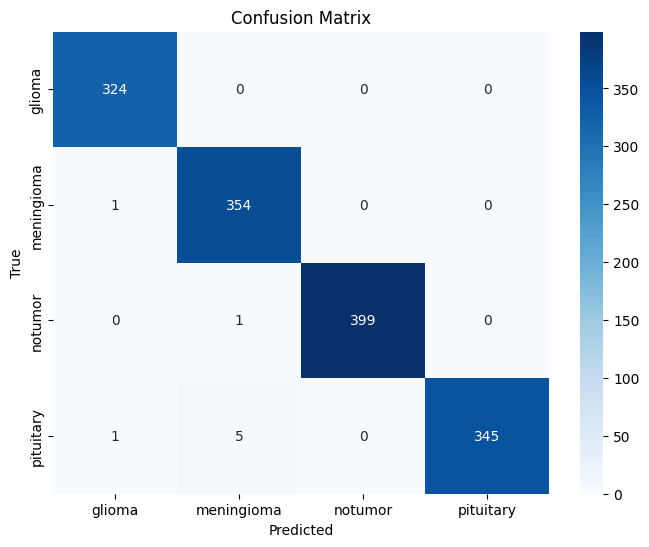

Macro-average AUC score: 0.9998
Cohen's Kappa Score: 0.9925


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ['glioma','meningioma','notumor','pituitary']
num_classes = len(class_names)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])



test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/testcase/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)



model = models.convnext_base(pretrained=False)
if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Sequential):
    in_features = model.classifier[2].in_features
    model.classifier[2] = nn.Linear(in_features, num_classes)
else:
    raise ValueError('No recognizable classifier head found.')


model = model.to(device)

model.load_state_dict(torch.load('convnext_base_smaller_input.pth', map_location=device))
model.eval()

y_true = []
y_pred = []
y_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(probs.cpu().numpy())


y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)



print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))



cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



y_true_onehot = label_binarize(y_true, classes=range(num_classes))


auc = roc_auc_score(y_true_onehot, y_scores, average='macro', multi_class='ovr')
print(f"Macro-average AUC score: {auc:.4f}")

kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")
